# Getting the Stock Market Data

In [2]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Getting the Stock Market Data 

In [7]:
#USING THE JPM stock
data = yf.download('JPM', start = '2022-01-01' , end = '2025-04-29')
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,JPM,JPM,JPM,JPM,JPM
Date,,,,,
2022-01-03,146.995804,147.850327,145.004949,145.323128,13120900
2022-01-04,152.568359,153.250158,149.295720,149.368447,20195800
2022-01-05,149.779099,153.967574,149.733370,153.473743,17539400
2022-01-06,151.370377,153.062219,149.861420,152.641551,14047500
2022-01-07,152.870178,153.208544,150.949693,151.507547,13913300


# Calculate the Moving Avergaes 

In [10]:
#short and long term average
data['SMA20'] = data['Close'].rolling(window = 20).mean()
data['SMA50'] = data['Close'].rolling(window = 50).mean()

# Creating the Buy/Sell Signals 

In [24]:
# Initialize Signal column
data['Signal'] = 0

# Assign signal using vectorized comparison between full SMA20 and SMA50
signal_values = np.where(data['SMA20'] > data['SMA50'], 1, 0)

# Assign the signals (skip first 50 rows to avoid NaNs from moving averages)
data.iloc[:, data.columns.get_loc('Signal')] = signal_values

# Create Position column based on changes in Signal
data['Position'] = data['Signal'].diff()

KeyError: 'SMA50'

# Plotting the Strategy 

KeyError: 'SMA50'

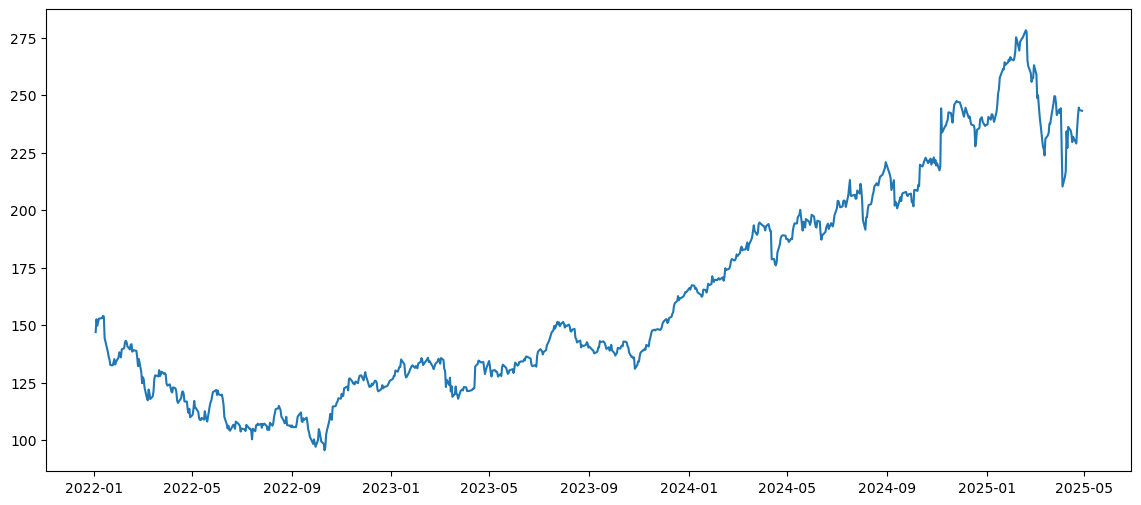

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA20'], label='SMA 20')
plt.plot(data['SMA50'], label='SMA 50')
plt.plot(data[data['Position'] == 1].index,
         data['SMA20'][data['Position'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Position'] == -1].index,
         data['SMA20'][data['Position'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')
plt.title('SMA Crossover Strategy')
plt.legend()
plt.grid()
plt.show()